## Data Preprocessing

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.exceptions import ConvergenceWarning
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler ,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
df= pd.read_csv(" https://www.dropbox.com/scl/fi/alydkzx7stzpgk1ad8slv/WA_Fn-UseC_-Telco-Customer-Churn.csv?rlkey=6z4csryifaf0m89q4uup34a4r&st=ycb2nw9d&dl=1")

In [ ]:
telco= df.copy()

In [ ]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check dataset information
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# check the duplicated
telco.duplicated().sum()

0

In [ ]:
# Check for missing values
telco.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Convert 'TotalCharges' from object to numeric
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')


In [ ]:
# Check for missing values
telco.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
## Check how many NaN values we have in 'TotalCharges' and replace (MonthlyCharges * tenure)
telco['TotalCharges'] = telco['TotalCharges'].fillna(telco['MonthlyCharges'] * telco['tenure'])
telco['TotalCharges'].isna().sum()

0

In [ ]:
# show the columns name
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# show more details  from data
telco.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


##EDA


In [ ]:
# Count the occurrences of each class in the Churn column
churn_counts = telco['Churn'].value_counts()
print(churn_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


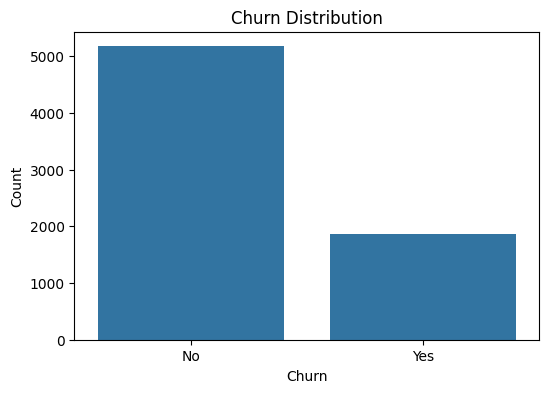

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=telco)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


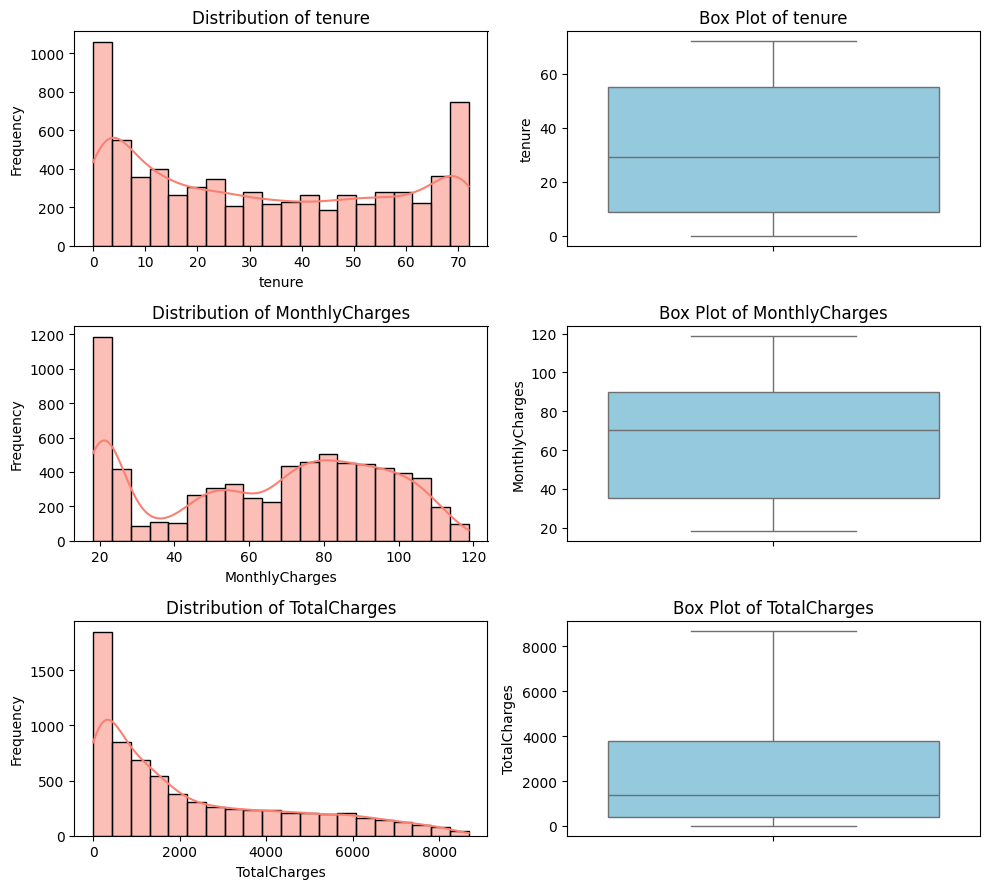

In [ ]:

fig, axes = plt.subplots(len(['tenure', 'MonthlyCharges', 'TotalCharges']), 2, figsize=(10, 9))
axes = axes.flatten()
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(telco[col], bins=20, kde=True, color='salmon', ax=axes[i*2])
    axes[i*2].set_title(f'Distribution of {col}')
    axes[i*2].set_xlabel(col)
    axes[i*2].set_ylabel('Frequency')

    sns.boxplot(y=telco[col], ax=axes[i*2 + 1], color='skyblue')
    axes[i*2 + 1].set_title(f'Box Plot of {col}')
    axes[i*2 + 1].set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Drop the columns it's irrelevant for modeling
telco = telco.drop(['gender','customerID'],  axis=1)

<ipython-input-17-29b44d729640>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-17-29b44d729640>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-17-29b44d729640>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-17-29b44d729640>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-17-29b44d729640>:13: FutureWarning: 

Pas

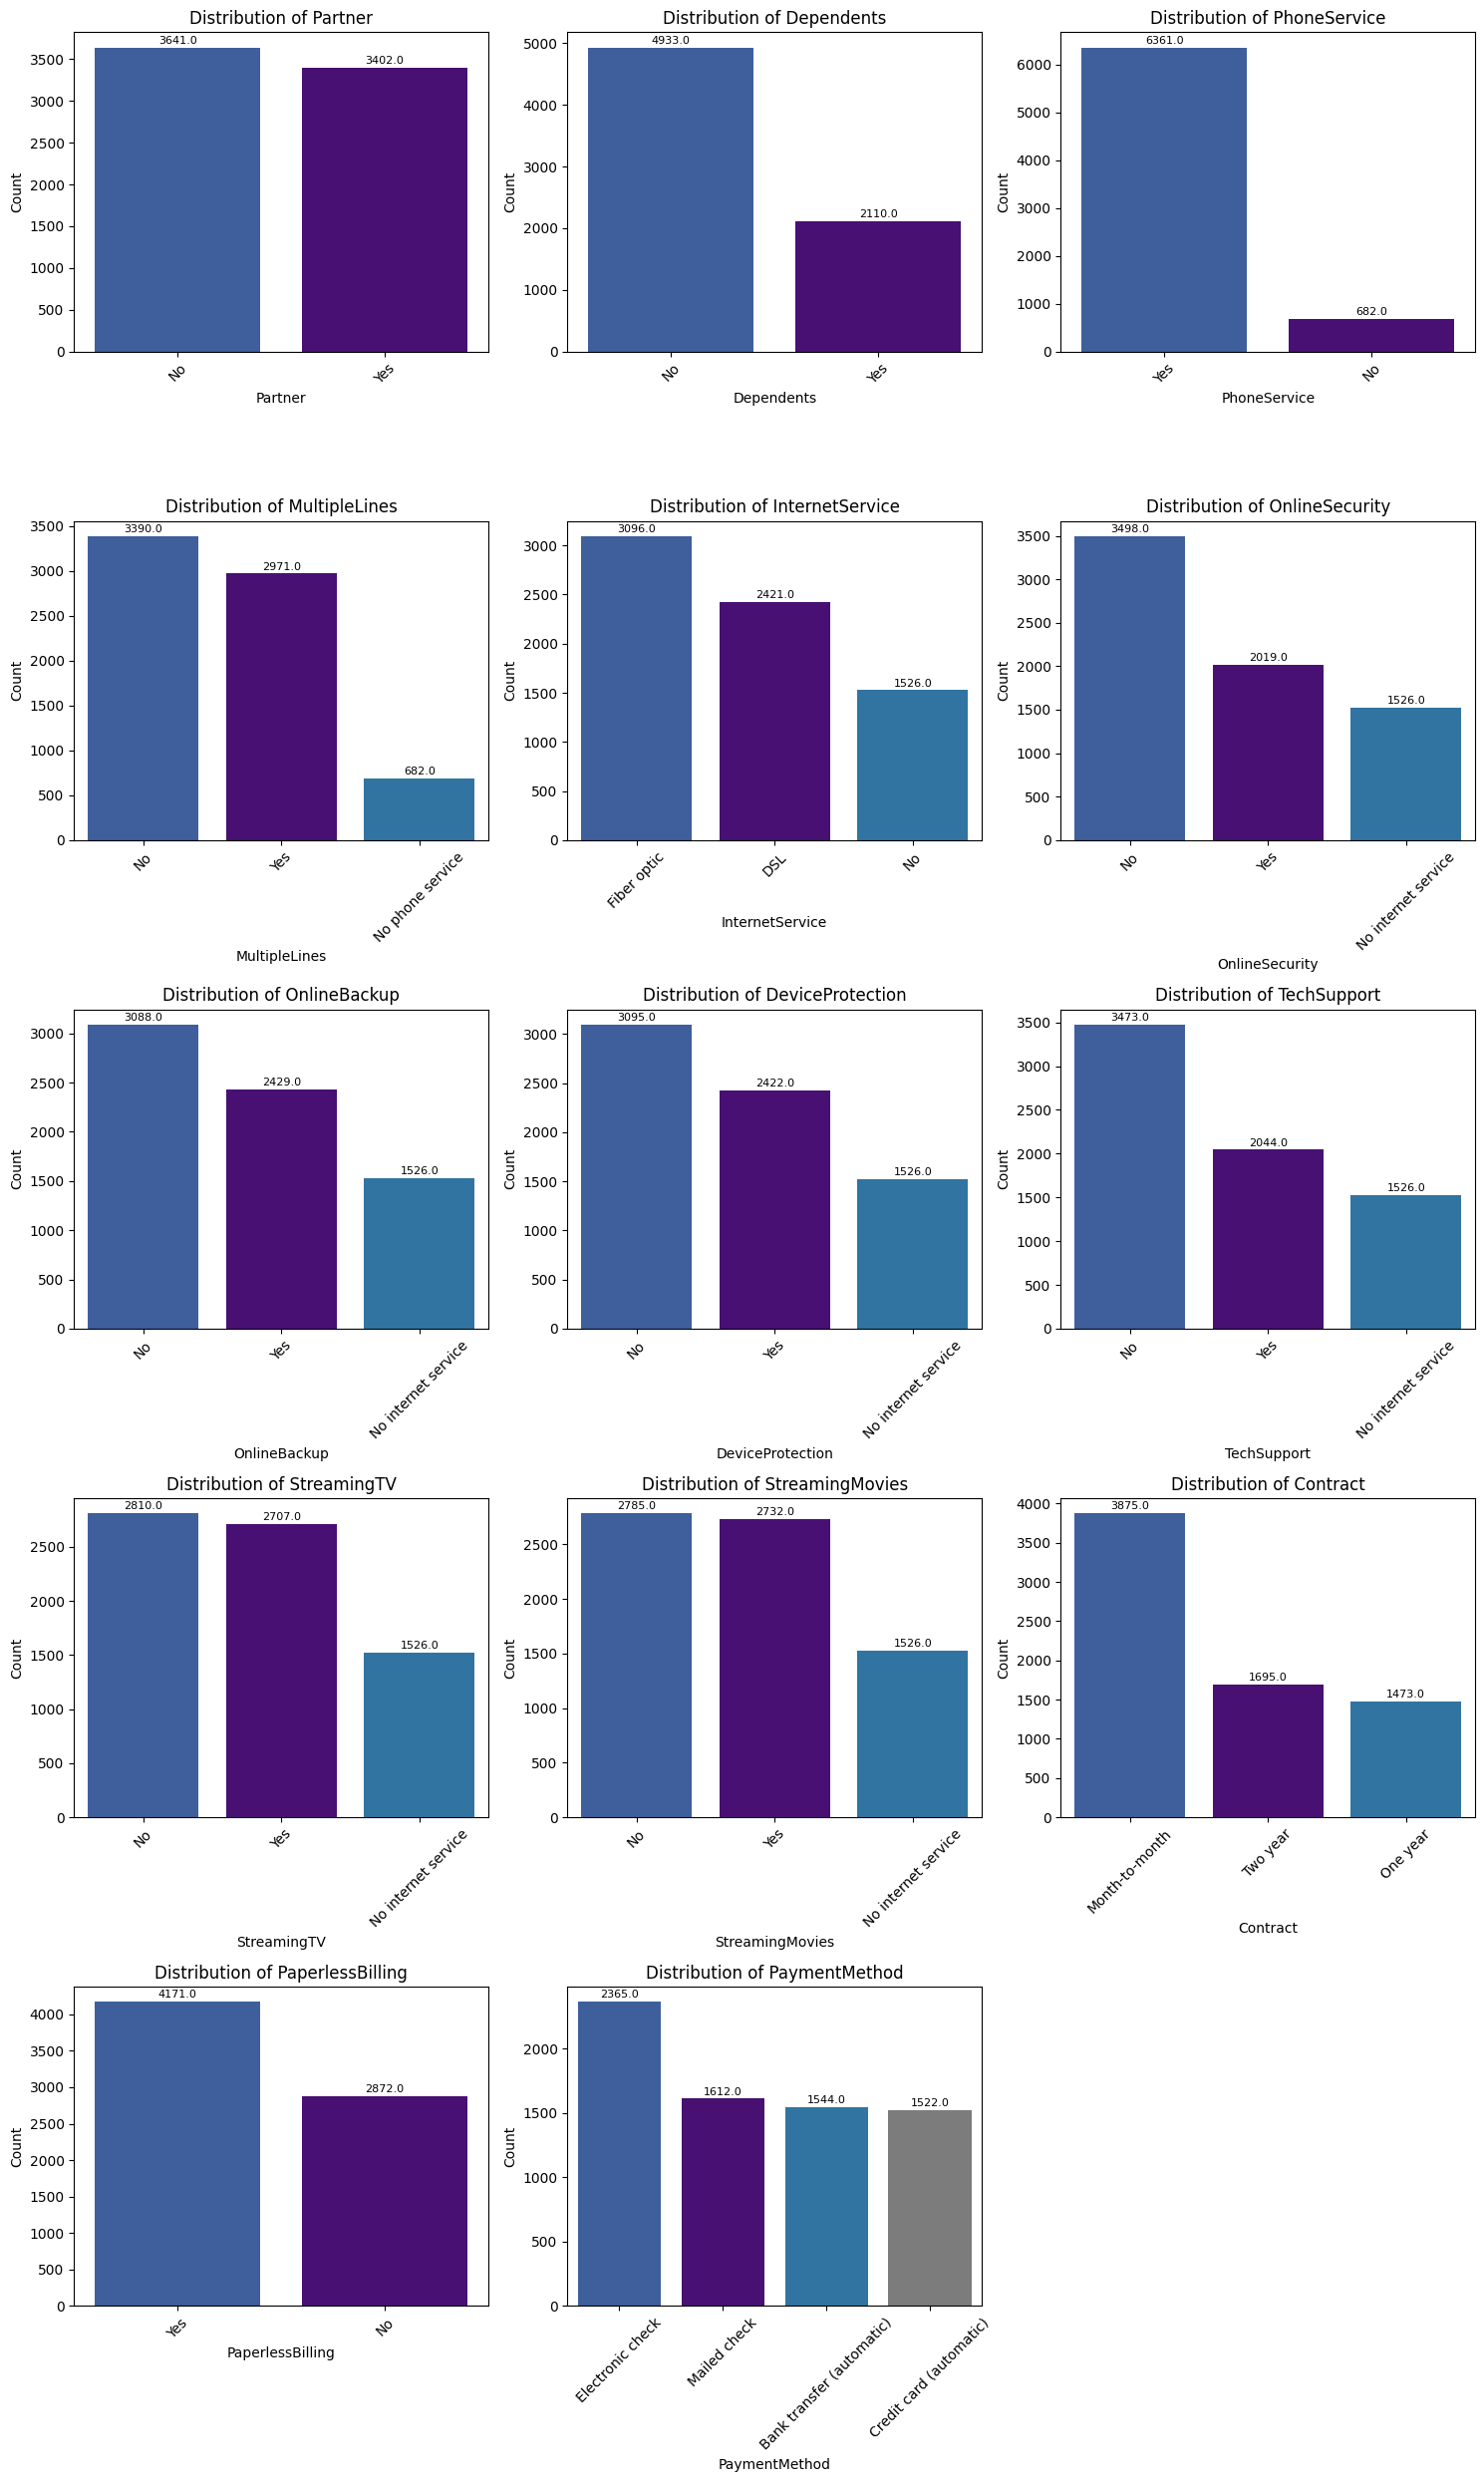

In [ ]:
telecom_colors = ['#2E5AAC', '#4B0082', '#1F77B4', '#7C7C7C', '#4169E1', '#6A5ACD']

# --- Categorical Features ---
categorical_cols = telco.select_dtypes(include=['object', 'category']).columns.drop('Churn')
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    palette = sns.color_palette(telecom_colors, n_colors=len(telco[col].unique()))

    sns.countplot(
        x=telco[col],
        order=telco[col].value_counts().index,
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)

    for p in axes[i].patches:
        axes[i].annotate(
            f'{p.get_height()}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=8
        )

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

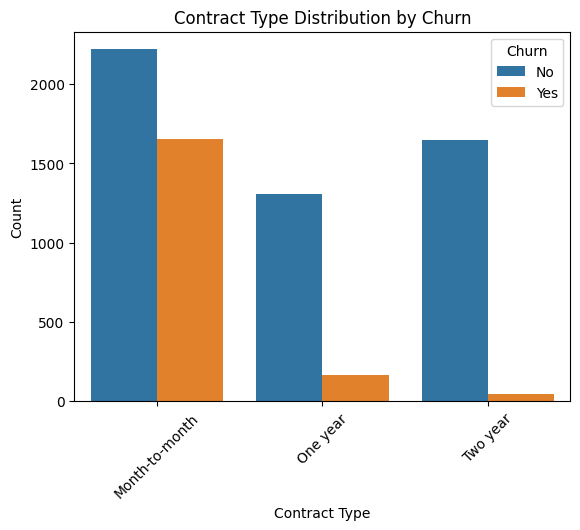

In [ ]:
#plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', data=telco, hue='Churn')
plt.title("Contract Type Distribution by Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


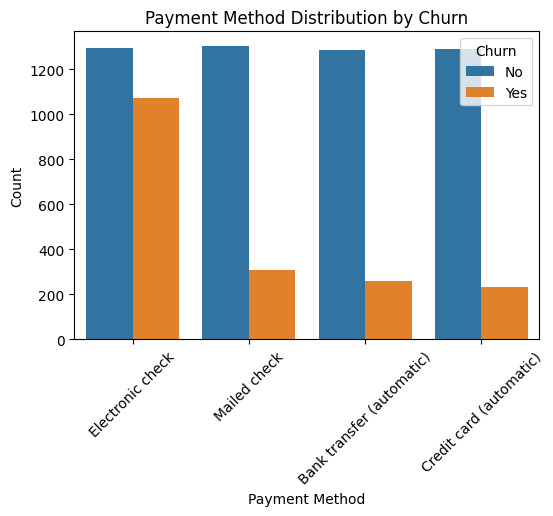

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='PaymentMethod', data=telco, hue='Churn')
plt.title("Payment Method Distribution by Churn")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


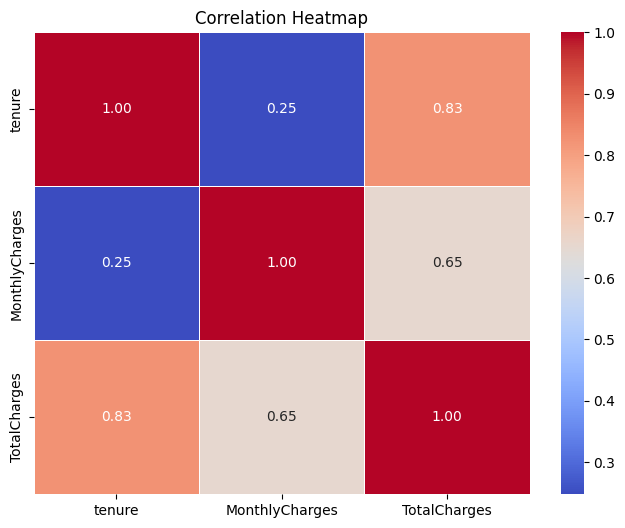

In [ ]:
# Correlation Analysis
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix =telco[numerical].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

##Model Building and Evaluation

###Feature Engineering

In [ ]:
columns_to_fix = ['Partner','Dependents','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'MultipleLines', 'PhoneService']
for col in columns_to_fix:
    telco[col] = telco[col].replace({'No internet service': 'No', 'No phone service':'No'})

In [ ]:
# Separate categorical and numerical features
categorical_cols = telco.select_dtypes(include=['object']).columns.tolist()
numerical_cols = telco.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable 'Churn' from categorical features
categorical_cols.remove('Churn')

# 🔹 Label Encoding for Binary Categorical Columns (Yes/No)
binary_cols = [ 'MultipleLines', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingMovies','StreamingTV','Partner', 'Dependents', 'PaperlessBilling']
for col in binary_cols:
    telco[col] = telco[col].map({'Yes': 1, 'No': 0})

# 🔹 Label Encoding for Target Variable (Churn)
telco['Churn'] = telco['Churn'].map({'Yes': 1, 'No': 0})

# 🔹 One-Hot Encoding for Multi-class Categorical Variables
multi_class_cols = list(set(categorical_cols) - set(binary_cols))  # Remaining categorical columns
telco = pd.get_dummies(telco, columns=multi_class_cols, drop_first=True)

# ✅ Display the final dataset
telco.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0,1,0,1,0,0,0,1,0,0,...,29.85,29.85,0,False,False,False,True,False,False,False
1,0,0,0,34,1,0,1,0,1,0,...,56.95,1889.50,0,False,False,False,False,True,True,False
2,0,0,0,2,1,0,1,1,0,0,...,53.85,108.15,1,False,False,False,False,True,False,False
3,0,0,0,45,0,0,1,0,1,1,...,42.30,1840.75,0,False,False,False,False,False,True,False
4,0,0,0,2,1,0,0,0,0,0,...,70.70,151.65,1,True,False,False,True,False,False,False


In [ ]:
# ✅ Check the final column names to ensure encoding is correct
telco.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [ ]:
#Calculate Max prior to scaling
max_tenure = telco['tenure'].max()

# Define bins and labels for tenure grouping
bins = [0, 12, 36, max_tenure]
labels = ['New', 'Mid', 'Loyal']

# Create new tenure group column
telco['TenureGroup'] = pd.cut(telco['tenure'], bins=bins, labels=labels, include_lowest=True)

# One-hot encode TenureGroup
telco = pd.get_dummies(telco, columns=['TenureGroup'])


# Check new column
telco.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,TenureGroup_New,TenureGroup_Mid,TenureGroup_Loyal
0,0,1,0,1,0,0,0,1,0,0,...,False,False,False,True,False,False,False,True,False,False
1,0,0,0,34,1,0,1,0,1,0,...,False,False,False,False,True,True,False,False,True,False
2,0,0,0,2,1,0,1,1,0,0,...,False,False,False,False,True,False,False,True,False,False
3,0,0,0,45,0,0,1,0,1,1,...,False,False,False,False,False,True,False,False,False,True
4,0,0,0,2,1,0,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False


In [ ]:
# افتراض أن X هو DataFrame يحتوي على البيانات
telco['TotalCharges_per_Month'] = telco['TotalCharges'] / telco['tenure'].replace(0, 1)  # تجنب القسمة على صفر
telco['tenure_group'] = pd.cut(telco['tenure'], bins=[0, 12, 36, float('inf')], labels=['New', 'Mid', 'Loyal'])

# تحويل tenure_group إلى أرقام باستخدام Label Encoding إذا لزم الأمر
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
telco['tenure_group'] = le.fit_transform(telco['tenure_group'])

In [ ]:
# Drop tenure
telco = telco.drop(['tenure'], axis=1)

### Base Model ( Logistic Regression )


In [ ]:
X = telco.drop('Churn', axis=1)
y = telco['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['MonthlyCharges', 'TotalCharges']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# Initialize the Logistic Regression(base) model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.fit(X_train, y_train)
# Evaluate Model Performance
y_pred = lr.predict(X_test)
# Evaluate Model Performance
accuracy_log_reg = accuracy_score(y_test, y_pred)
precision_log_reg = precision_score(y_test, y_pred)
recall_log_reg = recall_score(y_test, y_pred)
f1_log_reg = f1_score(y_test, y_pred)

# Display Results
print(f"📊 Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg:.3f}")
print(f"Precision: {precision_log_reg:.3f}")
print(f"Recall: {recall_log_reg:.3f}")
print(f"F1 Score: {f1_log_reg:.3f}")

📊 Logistic Regression Performance:
Accuracy: 0.798
Precision: 0.660
Recall: 0.497
F1 Score: 0.567


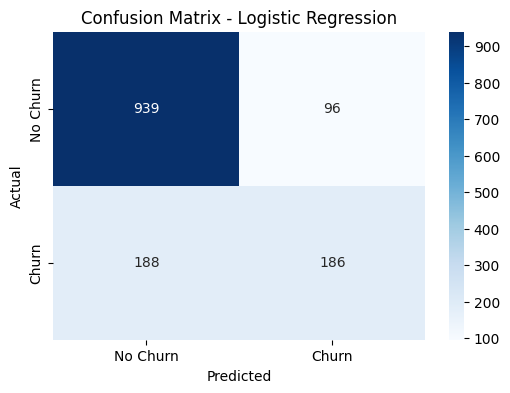

In [ ]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

###Logistic Regression with Class Weights

In [ ]:
# Initialize the Logistic Regression(base) model
balanced_lr = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
balanced_lr.fit(X_train, y_train)
balanced_lr.fit(X_train, y_train)
# Evaluate Model Performance
y_pred = balanced_lr.predict(X_test)
# Evaluate Model Performance
accuracy_log_reg = accuracy_score(y_test, y_pred)
precision_log_reg = precision_score(y_test, y_pred)
recall_log_reg = recall_score(y_test, y_pred)
f1_log_reg = f1_score(y_test, y_pred)

# Display Results
print(f"📊 Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg:.3f}")
print(f"Precision: {precision_log_reg:.3f}")
print(f"Recall: {recall_log_reg:.3f}")
print(f"F1 Score: {f1_log_reg:.3f}")

📊 Logistic Regression Performance:
Accuracy: 0.739
Precision: 0.505
Recall: 0.781
F1 Score: 0.613


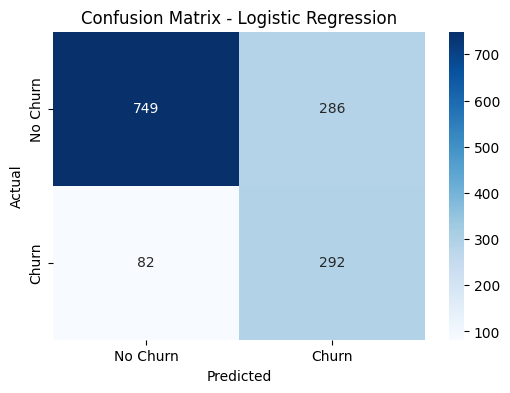

In [ ]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

###Logistic Regression with Smoth

In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

smote_lr = LogisticRegression(max_iter=500,random_state=42)
smote_lr.fit(X_train_res, y_train_res)
# Evaluate Model Performance
# Predictions on both train and test sets
y_train_pred = smote_lr.predict(X_train_res)
y_test_pred = smote_lr.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_test_pred)
precision_log_reg = precision_score(y_test, y_test_pred)
recall_log_reg = recall_score(y_test, y_test_pred)
f1_log_reg = f1_score(y_test, y_test_pred)

# Display Results
print(f"📊 Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg:.3f}")
print(f"Precision: {precision_log_reg:.3f}")
print(f"Recall: {recall_log_reg:.3f}")
print(f"F1 Score: {f1_log_reg:.3f}")

📊 Logistic Regression Performance:
Accuracy: 0.757
Precision: 0.534
Recall: 0.663
F1 Score: 0.592


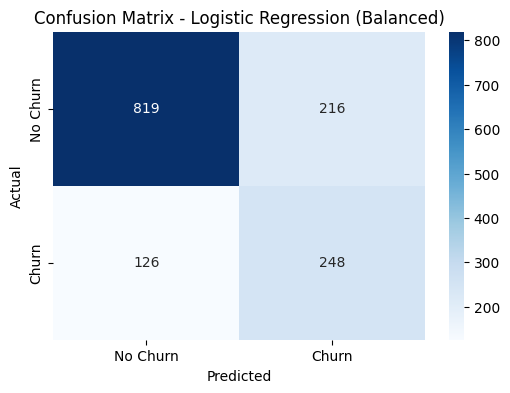

In [ ]:
# Confusion Matrix Heatmap
cm_balanced = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_balanced, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Balanced)")
plt.show()

###Advanced Models

In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize models with hyperparameters as keyword arguments
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)

# List of models and their names
models = [
    ('Random Forest', rf),
    ('XGBoost', xgb),
    ('Decision Tree', dt)
]
# Fit models on training data and calculate metrics
print("\n=== Model Performance ===")
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📊 {name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")


=== Model Performance ===

📊 Random Forest Performance:
Accuracy: 0.799
Precision: 0.662
Recall: 0.497
F1 Score: 0.568

📊 XGBoost Performance:
Accuracy: 0.802
Precision: 0.662
Recall: 0.519
F1 Score: 0.582

📊 Decision Tree Performance:
Accuracy: 0.781
Precision: 0.628
Recall: 0.425
F1 Score: 0.507


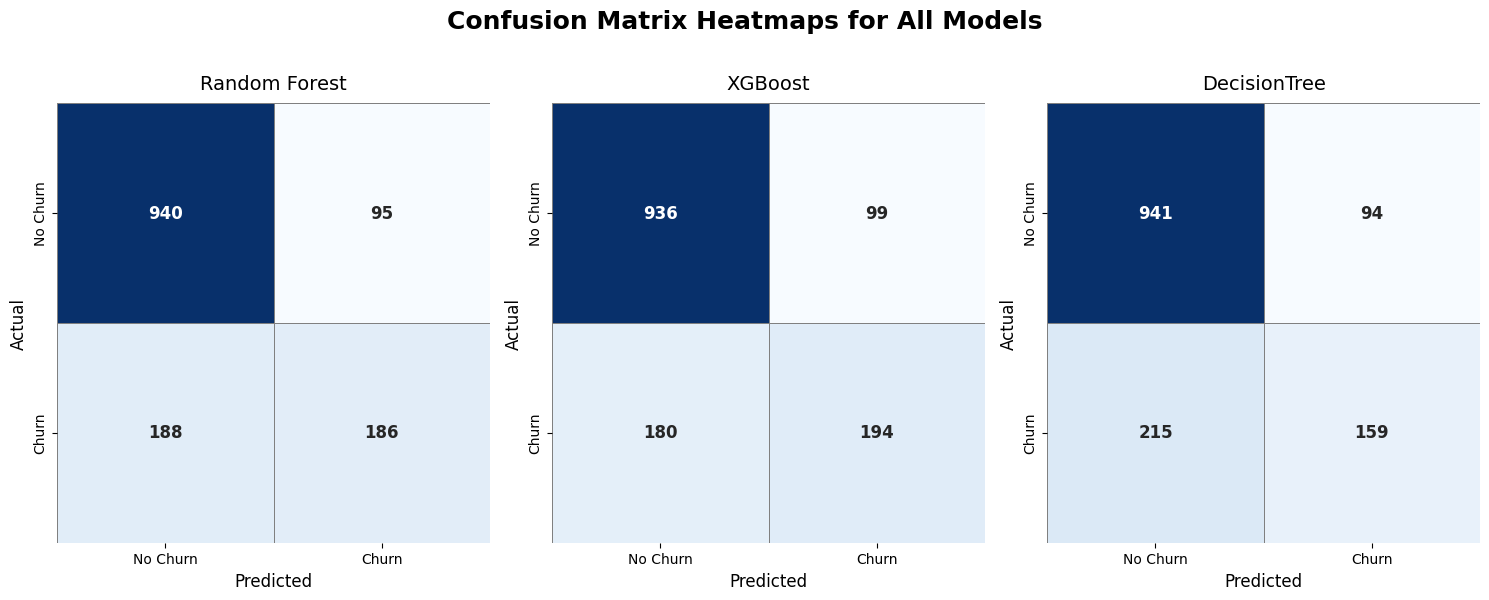

In [ ]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Fit your models and get predictions (your existing code)
models = [
          ('Random Forest', rf), ('XGBoost', xgb), ('DecisionTree', dt)]

# Store predictions for each model
predictions = {}
for name, model in models:
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot heatmaps for each model's confusion matrix
for idx, (name, model) in enumerate(models):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions[name])

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d',cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], ax=axes[idx],
                cbar=False,  # Remove color bar for cleaner look
                annot_kws={"size": 12, "weight": "bold"},  # Customize annotation text
                linewidths=0.5, linecolor='gray')  # Add grid lines

    # Customize the subplot
    axes[idx].set_title(f'{name}', fontsize=14, pad=10)
    axes[idx].set_xlabel('Predicted', fontsize=12)
    axes[idx].set_ylabel('Actual', fontsize=12)
    axes[idx].tick_params(axis='both', which='major', labelsize=10)

# Remove extra subplots if the number of models < number of subplots
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Add a title for the entire figure
fig.suptitle('Confusion Matrix Heatmaps for All Models', fontsize=18, weight='bold', y=1.05)

# Show the plot
plt.show()

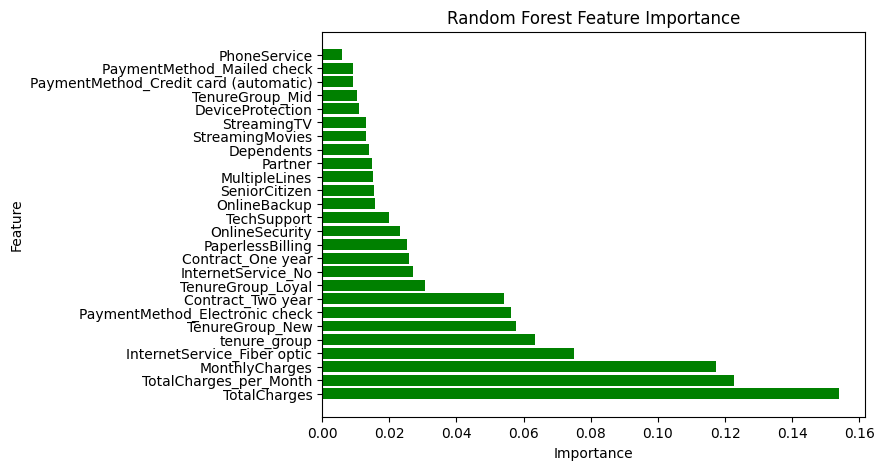

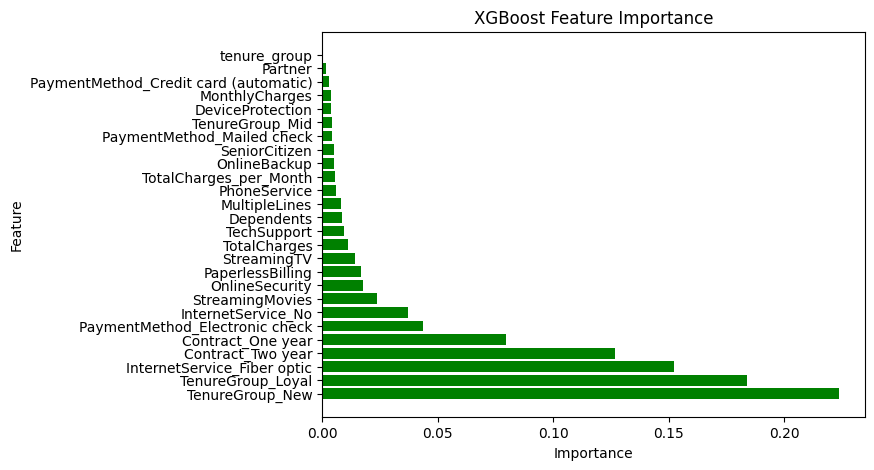

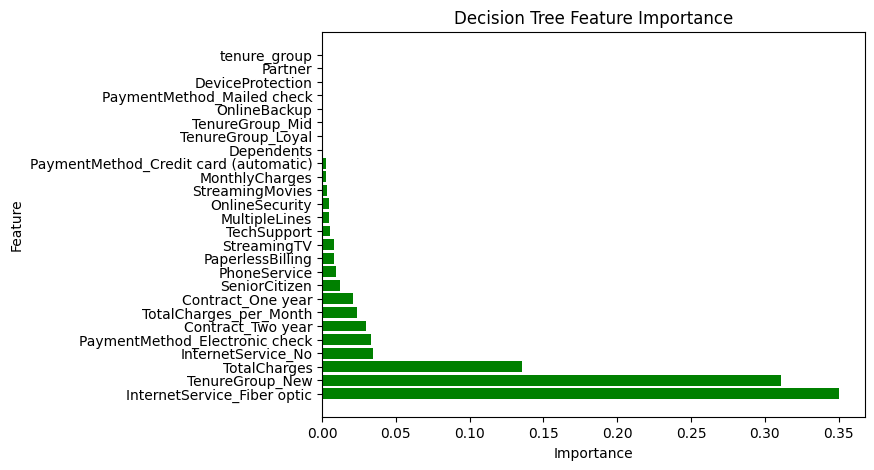

In [ ]:
# Feature Importance Plotting
def plot_feature_importance(model, model_name, X, color='green'):
    """Plots feature importance for a given tree-based model."""
    importances = model.feature_importances_
    df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    df = df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(7, 5))
    plt.barh(df['Feature'], df['Importance'], color=color)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"{model_name} Feature Importance")
    plt.show()

# Plot for Random Forest, XGBoost, and Decision Tree
plot_feature_importance(rf, "Random Forest", X)
plot_feature_importance(xgb, "XGBoost", X)
plot_feature_importance(dt, "Decision Tree", X)


###Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Random Forest tuning
param_grid = rf_params = {
    'n_estimators': [300],  # Number of trees
    'max_depth': [10],  # Tree depth
    'min_samples_split': [5],  # Minimum samples to split
    'min_samples_leaf': [1],  # Minimum samples per leaf
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)  # Fit GridSearchCV to the training dat
print("Best F1 Score:", grid.best_score_)


Best F1 Score: 0.571497934798051


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble model
ensemble_model = VotingClassifier(estimators=models, voting='soft') # 'soft' uses probabilities
ensemble_model.fit(X_train, y_train)# Fit the ensemble model to the training data
y_pred = ensemble_model.predict(X_test)

# Print the ensemble model's performance metrics
print("\n📊 Ensemble Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


📊 Ensemble Model Performance:
Accuracy: 0.806
Precision: 0.674
Recall: 0.519
F1 Score: 0.586

Confusion Matrix:
[[941  94]
 [180 194]]


In [ ]:
from sklearn.feature_selection import RFE

# Apply RFE to Random Forest
rfe = RFE(estimator=rf, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Re-train Random Forest on selected features
rf.fit(X_train_rfe, y_train)
y_pred = rf.predict(X_test_rfe)

# Print performance metrics
print("\n📊 Random Forest with RFE Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


📊 Random Forest with RFE Performance:
Accuracy: 0.783
Precision: 0.613
Recall: 0.492
F1 Score: 0.546

Confusion Matrix:
[[919 116]
 [190 184]]


In [ ]:
# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# Random Forest with refined parameters
rf_smote = RandomForestClassifier(
    n_estimators=200,      # Increased for stability
    max_depth=6,           # Further reduced depth
    min_samples_split=15,  # Consistent split requirement
    min_samples_leaf=4,    # Consistent leaf requirement
    random_state=42
)
# XGBoost with enhanced regularization and slower learning
xgb_smote = XGBClassifier(
    n_estimators=300,      # More trees
    max_depth=10,           # Limited depth
    learning_rate=0.01,
    subsample=0.6,
    colsample_bytree= 0.6 ,# Slower learning

)

# List of models
models = [
    ('Random Forest', rf_smote),
    ('XGBoost', xgb_smote)
]

# Re-train and evaluate models
print("\n=== Model Performance with SMOTE (Final Optimization) ===")
for name, model in models:
    # Train on resampled data
    if name == 'xgb_smote':
        xgb_tuned = RandomizedSearchCV(XGBClassifier(random_state=42), xgb, n_iter=10, cv=5, n_jobs=-1, scoring='f1', random_state=42)
  # Use early stopping for XGBoost
        model.fit(
            X_train_res, y_train_res,

        )
    else:
        model.fit(X_train_res, y_train_res)

    # Predictions on both train and test sets
    y_train_pred = model.predict(X_train_res)
    y_test_pred = model.predict(X_test)

    # Performance on Test Set
    print(f"\n📊 {name} Performance (Test Set with SMOTE):")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_test_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_test_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred):.3f}")
    print("\nConfusion Matrix (Test Set):")
    print(confusion_matrix(y_test, y_test_pred))




=== Model Performance with SMOTE (Final Optimization) ===

📊 Random Forest Performance (Test Set with SMOTE):
Accuracy: 0.764
Precision: 0.540
Recall: 0.746
F1 Score: 0.626

Confusion Matrix (Test Set):
[[797 238]
 [ 95 279]]

📊 XGBoost Performance (Test Set with SMOTE):
Accuracy: 0.762
Precision: 0.542
Recall: 0.655
F1 Score: 0.593

Confusion Matrix (Test Set):
[[828 207]
 [129 245]]


###Storing & Comparing All Model Results in a Table & Visualization

In [ ]:

# Initialize a dictionary to store model results
model_results = {}

# Function to store model results
def store_results(model_name, accuracy, precision, recall, f1):
    model_results[model_name] = {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    }

# --- Logistic Regression (Base) ---
y_pred = lr.predict(X_test)
store_results("Logistic Regression (Base)", accuracy_score(y_test, y_pred),
              precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

# --- Logistic Regression (Balanced) ---
y_pred = balanced_lr.predict(X_test)
store_results("Logistic Regression (Balanced )", accuracy_score(y_test, y_pred),
              precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

# --- Logistic Regression (SMOTE) ---
y_pred = smote_lr.predict(X_test)
store_results("Logistic Regression (SMOTE)", accuracy_score(y_test, y_test_pred),
              precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred), f1_score(y_test, y_test_pred))

# --- Base Models (Random Forest, XGBoost, Decision Tree) ---
models_initial = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42))
]
for name, model in models_initial:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    store_results(f"{name} (Base)", accuracy_score(y_test, y_pred),
                  precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

# --- Ensemble Model (Voting Classifier) ---
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
store_results("Ensemble (Soft Voting)", accuracy_score(y_test, y_pred),
              precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

# --- Random Forest with RFE ---
rf.fit(X_train_rfe, y_train)
y_pred = rf.predict(X_test_rfe)
store_results("Random Forest (RFE)", accuracy_score(y_test, y_pred),
              precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

# --- Models with SMOTE (Refined Parameters) ---
rf_smote.fit(X_train_res, y_train_res)
y_pred_rf_smote = rf_smote.predict(X_test)
store_results("Random Forest (SMOTE + Refined)", accuracy_score(y_test, y_pred_rf_smote),
              precision_score(y_test, y_pred_rf_smote), recall_score(y_test, y_pred_rf_smote), f1_score(y_test, y_pred_rf_smote))

xgb_smote.fit(X_train_res, y_train_res)
y_pred_xgb_smote = xgb_smote.predict(X_test)
store_results("XGBoost (SMOTE + Refined)", accuracy_score(y_test, y_pred_xgb_smote),
              precision_score(y_test, y_pred_xgb_smote), recall_score(y_test, y_pred_xgb_smote), f1_score(y_test, y_pred_xgb_smote))



In [ ]:

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(model_results, orient='index')

# Display results as a sorted table
results_df = results_df.sort_values(by="F1 Score", ascending=False)  # Sort by best F1 Score
display(results_df)  # Works in Jupyter Notebook & Colab



,Accuracy,Precision,Recall,F1 Score
Random Forest (SMOTE + Refined),0.7637,0.5397,0.7460,0.6263
Logistic Regression (Balanced ),0.7388,0.5052,0.7807,0.6134
Logistic Regression (SMOTE),0.7615,0.5420,0.6551,0.5932
XGBoost (SMOTE + Refined),0.7615,0.5420,0.6551,0.5932
Ensemble (Soft Voting),0.8055,0.6736,0.5187,0.5861
XGBoost (Base),0.8020,0.6621,0.5187,0.5817
Random Forest (Base),0.7991,0.6619,0.4973,0.5679
Logistic Regression (Base),0.7984,0.6596,0.4973,0.5671
Random Forest (RFE),0.7828,0.6133,0.4920,0.5460
Decision Tree (Base),0.7807,0.6285,0.4251,0.5072


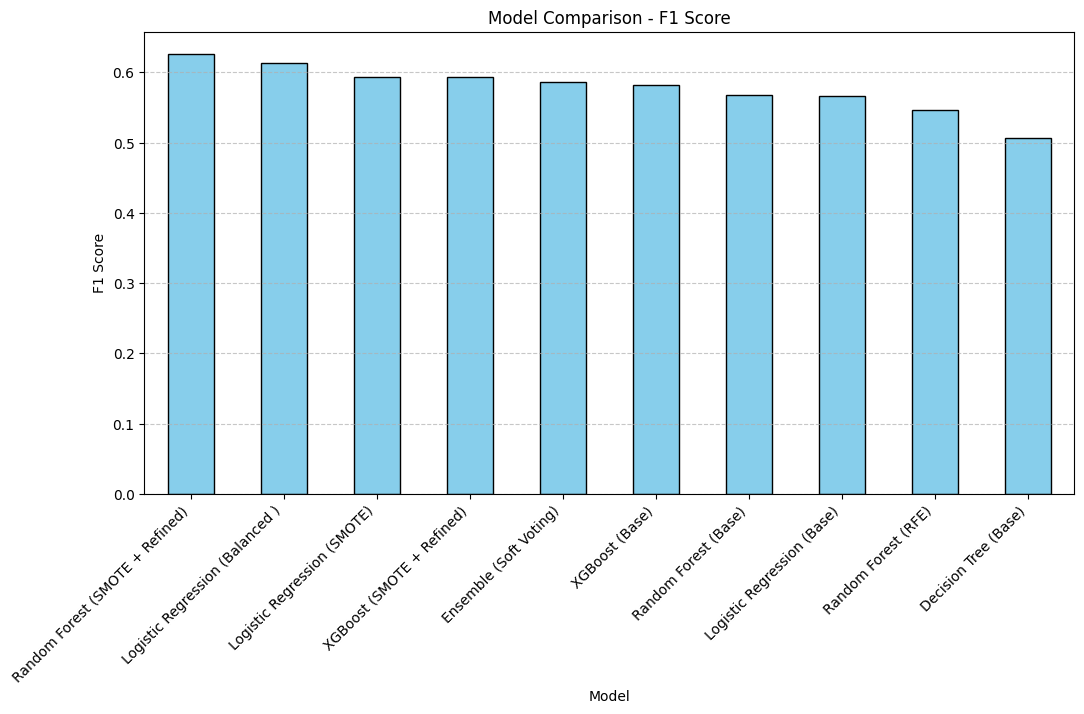

In [ ]:

# Plot Comparison of F1 Scores
plt.figure(figsize=(12, 6))
results_df["F1 Score"].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Model Comparison - F1 Score")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


## Model Deployment

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_smote, "churn_prediction_rf.pkl")

print("Model saved successfully!")


Model saved successfully!
